# Projet SIFT - Traitement d'image - Partie 1

Zoé Abecassis, Clémence Fonteneau, Prieur Maxime

## Librairies

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time
import math

# Librairie personnelle
import UtilsProjetTim as tim

k = $\sqrt{2}$ optimal selon les résultats empiriques de  Lowe.

$\sigma=1.6$ fournissant une répétabilité optimale selon les résultats empiriques de  Lowe.

s = 2 $\rightarrow Nombre Element /Octave = 2 + 3 = 5$.

Entre chaque octave ou sous echantillonne par 2 la gaussienne.

/Users/maximeprieur/INSA/Cours_INSA/Traitement Image/Projet/UtilsProjetTim.py:93: RuntimeWarning: overflow encountered in ubyte_scalars
  dxy = ((DOG[x+1,y+1]-DOG[x+1,y-1])-(DOG[x-1,y+1]-DOG[x-1,y-1]))/4.0
/Users/maximeprieur/INSA/Cours_INSA/Traitement Image/Projet/UtilsProjetTim.py:88: RuntimeWarning: overflow encountered in ubyte_scalars
  dx = (DOG[x+1,y]-DOG[x-1,y])/2.0
/Users/maximeprieur/INSA/Cours_INSA/Traitement Image/Projet/UtilsProjetTim.py:89: RuntimeWarning: overflow encountered in ubyte_scalars
  dy = (DOG[x,y+1]-DOG[x,y-1])/2.0
/Users/maximeprieur/INSA/Cours_INSA/Traitement Image/Projet/UtilsProjetTim.py:90: RuntimeWarning: overflow encountered in ubyte_scalars
  ds = (DOG_next[x,y]-DOG_prev[x,y])/2.0
/Users/maximeprieur/INSA/Cours_INSA/Traitement Image/Projet/UtilsProjetTim.py:96: RuntimeWarning: overflow encountered in ubyte_scalars
  dys = ((DOG_next[x,y+1]-DOG_next[x,y-1])-(DOG_prev[x,y+1]-DOG_prev[x,y-1]))/4.0
/Users/maximeprieur/INSA/Cours_INSA/Traitement Image/Proj

Temps traitement :  2.744922161102295 secondes


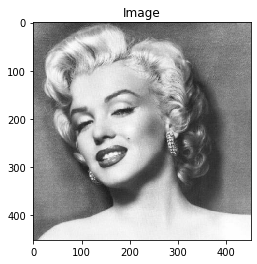

In [3]:
# Image
path_base = './BASE_IMAGE//'
image = cv.imread(path_base+'marylin.jpg',0)
plt.figure()
plt.title("Image")
plt.imshow(image,'gray',vmin=0,vmax=255)

# Parametres
s = 2
k = 2**(1/s)
r = 10
sigma_initial = 1.6
nb_octave = 3
seuil = 0.03
R_th = (r+1)**2/10

time0 = time.time()

# Octaves est une liste de tuples, un tuples est un ensemble de 5 L(x,y,sigma) avec le premier à sigma = sigma_inital*2**(indice_tuple)
octaves = tim.Octaves(image,sigma_initial,s,k,nb_octave) # Image lissée sur différents octave

# differences_de_Gaussiennes est une liste nb_octave matrices 3 dimension,D(x,y,sigma) avec la 3 eme dimension representant les echelles
differences_de_Gaussiennes = tim.Differences_de_Gaussiennes(image,octaves)

# Emplacement des points clés
pointsCles , pointCandidats_selectionne= tim.obtention_Points_cles(differences_de_Gaussiennes,seuil ,R_th,sigma_initial)

print ("Temps traitement : ",time.time()-time0,"secondes")

### Pyramide d'octave

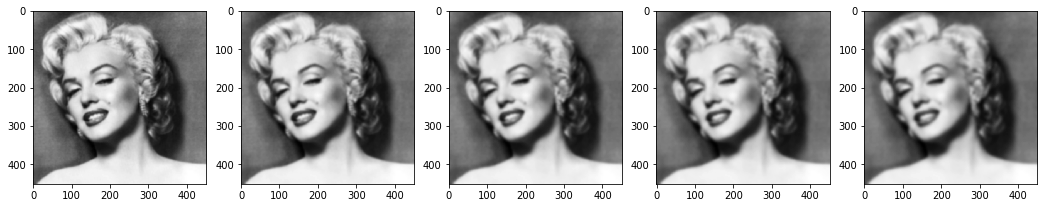

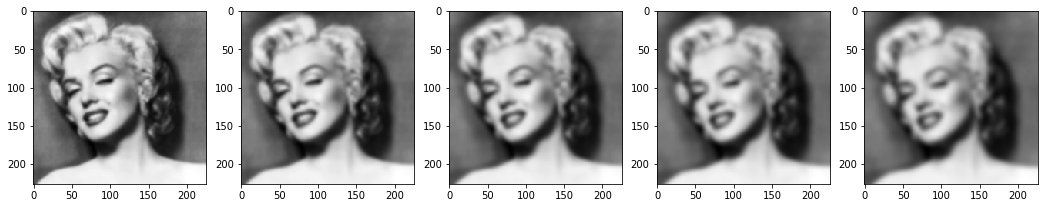

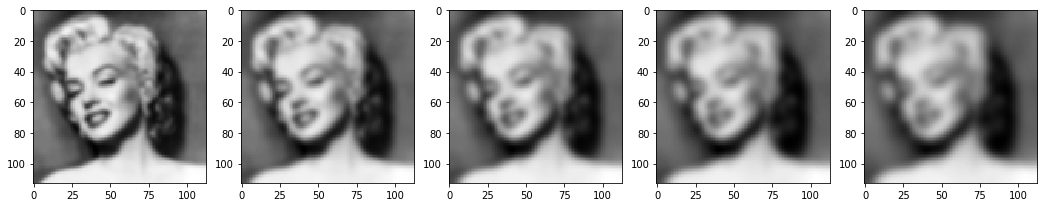

In [4]:
for i in octaves :
    plt.figure(figsize=(18,18))
    for j in range(1,len(i)+1) :
        plt.subplot(1,len(i),j)
        plt.imshow(i[j-1],'gray')


### Affichage des points candidats et des points clés

On a : 116  points candidats pour l'octave initial
On a : 113  points clés pour l'octave initial


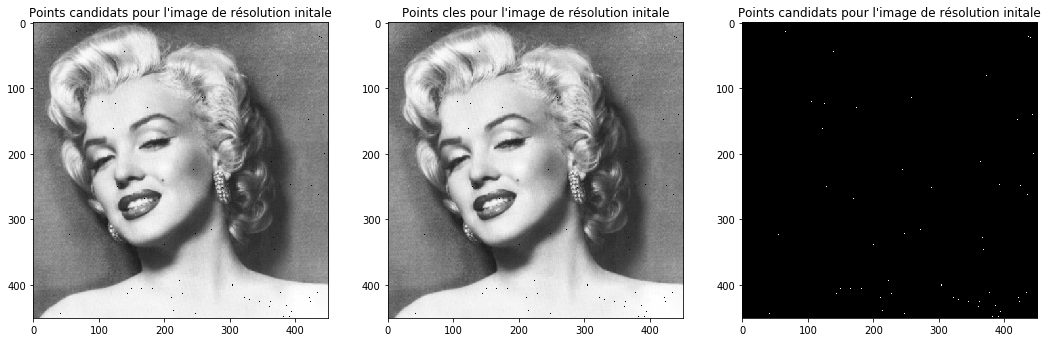

In [5]:
pointsCandidats = list()
for i in range(nb_octave):
    pointsCandidats.append(tim.Point_candidats_par_octave(differences_de_Gaussiennes[i]));

# Creation des images
image_points_cles = image.copy()
image_points_candidats = image.copy()
image_points_candidats_black = np.zeros((image.shape))

for i in pointsCandidats[0] :
       image_points_candidats[i[0],i[1]]=0


for i in pointCandidats_selectionne[0] :
    image_points_cles[i[0],i[1]]=0
    image_points_candidats_black[int(i[0]),int(i[1])] = 255
    
print("On a :",len(pointsCandidats[0])," points candidats pour l'octave initial")
print("On a :",len(pointCandidats_selectionne[0])," points clés pour l'octave initial")

plt.figure(figsize = (18,18))
plt.subplot(1,3,1)
plt.title("Points candidats pour l'image de résolution initale")
plt.imshow(image_points_candidats,'gray')

plt.subplot(1,3,2)
plt.title("Points cles pour l'image de résolution initale")
plt.imshow(image_points_cles,'gray')        
        
plt.subplot(1,3,3)
plt.title("Points candidats pour l'image de résolution initale")
plt.imshow(image_points_candidats_black,'gray')